In [90]:
import torchvision
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [91]:
def getData(mode):
    if mode == 'train':
        img = pd.read_csv('train_img.csv')
        label = pd.read_csv('train_label.csv')
        return np.squeeze(img.values), np.squeeze(label.values)
    else:
        img = pd.read_csv('test_img.csv')
        label = pd.read_csv('test_label.csv')
        return np.squeeze(img.values), np.squeeze(label.values)

In [92]:
img, label = getData('train')
img, label

(array(['6592_left', '30349_right', '1741_right', ..., '38060_left',
        '35445_right', '5858_left'], dtype=object),
 array([0, 3, 0, ..., 0, 2, 0]))

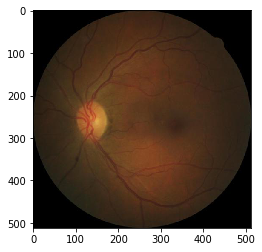

In [93]:
plt.figure()
plt.imshow(io.imread('/home/ym.10612012/Deep_learning_lab/lab3_Diabetic_Retinopathy_Detection/data/data/' + img[0] + '.jpeg'))
plt.show()

In [94]:
class RetinopathyLoader(Dataset):
    def __init__(self, root, mode, transform=None):
        """
        Args:
            root (string): Root path of the dataset.
            mode : Indicate procedure status(training or testing)

            self.img_name (string list): String list that store all image names.
            self.label (int or float list): Numerical list that store all ground truth label values.
        """
        self.root = root
        self.img_name, self.label = getData(mode)
        self.mode = mode
        self.transform = transform
        print("> Found %d images..." % (len(self.img_name)))

    def __len__(self):
        """'return the size of dataset"""
        return len(self.img_name)

    def __getitem__(self, index):
        """something you should implement here"""
        img_path = self.root + self.img_name[index] + '.jpeg'
        img = io.imread(img_path)
        label = self.label[index]
        sample = {'image' : img, 'label' : label}
        
        if self.transform:
            sample = self.transform(sample)
        
        """
           step1. Get the image path from 'self.img_name' and load it.
                  hint : path = root + self.img_name[index] + '.jpeg'
           
           step2. Get the ground truth label from self.label
                     
           step3. Transform the .jpeg rgb images during the training phase, such as resizing, random flipping, 
                  rotation, cropping, normalization etc. But at the beginning, I suggest you follow the hints. 
                       
                  In the testing phase, if you have a normalization process during the training phase, you only need 
                  to normalize the data. 
                  
                  hints : Convert the pixel value to [0, 1]
                          Transpose the image shape from [H, W, C] to [C, H, W]
                         
            step4. Return processed image and label
        """
    
        return sample #img, label

In [104]:
root = '/home/ym.10612012/Deep_learning_lab/lab3_Diabetic_Retinopathy_Detection/data/data/'
Retino_dataset = RetinopathyLoader(root, mode='train')
for i in range(len(sample)):
    sample = Retino_dataset[i]
    print(i, sample['image'].shape, sample['label'])

> Found 28099 images...
0 (512, 512, 3) 0
1 (512, 512, 3) 3
